In [224]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from mplsoccer import PyPizza, add_image, FontManager
from scipy import stats
import math
import matplotlib.pyplot as plt
from urllib.request import urlopen
from PIL import Image

In [12]:
df = pd.read_csv('uel_19_20.csv')

In [14]:
df.head()

,Team,MP,npxG,Sh/90,SoT/90,G/Sh,Distance,npxG/Sh,Completed Passes,Pass %,...,Press,5-Second Gain,Pressures %,Pressures Att 3rd,Touches Def 3rd,Touches Att 3rd,Touches Att Pen,Dribbles Attemped,Dribbles Succ%,Possession
0,Ajax,2,0.75,5.00,1.00,0.10,13.0,0.15,420.5,76.2,...,122.0,37.5,30.7,21.5,227.0,166.0,20.5,15.0,50.0,67.5
1,APOEL,8,0.78,8.50,3.00,0.10,20.4,0.09,284.9,76.3,...,186.1,44.5,23.9,31.6,165.8,109.9,15.6,21.1,62.1,38.1
2,Arsenal,8,1.95,14.88,4.44,0.13,15.4,0.13,472.3,84.1,...,167.7,48.6,29.0,39.5,201.2,181.4,31.1,21.0,58.6,58.0
3,Astana FK,6,0.50,8.17,2.67,0.06,18.9,0.06,335.0,79.2,...,206.3,41.3,20.0,32.5,232.2,99.8,13.7,18.3,54.5,38.7
4,AZ Alkmaar,8,1.60,12.87,4.75,0.13,18.2,0.13,515.9,83.8,...,173.4,52.8,30.4,39.4,241.1,166.6,25.8,23.6,70.9,58.9


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Team                56 non-null     object 
 1   MP                  56 non-null     int64  
 2   npxG                56 non-null     float64
 3   Sh/90               56 non-null     float64
 4   SoT/90              56 non-null     float64
 5   G/Sh                56 non-null     float64
 6   Distance            56 non-null     float64
 7   npxG/Sh             56 non-null     float64
 8   Completed Passes    56 non-null     float64
 9   Pass %              56 non-null     float64
 10  Key Passes          56 non-null     float64
 11  Progressive Passes  56 non-null     float64
 12  Passes in Press     56 non-null     float64
 13  High Passes         56 non-null     float64
 14  Tackles Att 3rd     56 non-null     float64
 15  Dribbles Past       56 non-null     float64
 16  Press     

In [22]:
params = list(df.columns[2:])
print(params)

['npxG', 'Sh/90', 'SoT/90', 'G/Sh', 'Distance', 'npxG/Sh', 'Completed Passes', 'Pass %', 'Key Passes', 'Progressive Passes', 'Passes in Press', 'High Passes', 'Tackles Att 3rd', 'Dribbles Past', 'Press', '5-Second Gain', 'Pressures %', 'Pressures Att 3rd', 'Touches Def 3rd', 'Touches Att 3rd', 'Touches Att Pen', 'Dribbles Attemped', 'Dribbles Succ%', 'Possession']


In [257]:
lask = df[df.Team == 'LASK']
lask = lask.iloc[:,2:].values.tolist()[0]
print(lask)

[1.37, 17.3, 4.5, 0.08, 18.5, 0.08, 311.4, 71.1, 12.0, 44.1, 66.5, 129.2, 2.2, 23.5, 233.7, 70.5, 30.2, 63.8, 144.9, 178.2, 27.2, 16.0, 55.6, 45.8]


In [258]:
values = []
for x in range(len(params)):
    values.append(math.floor(stats.percentileofscore(df[params[x]],lask[x])))

In [259]:
URL = "https://cdn.freebiesupply.com/logos/large/2x/lask-linz-logo-png-transparent.png"
image = Image.open(urlopen(URL))

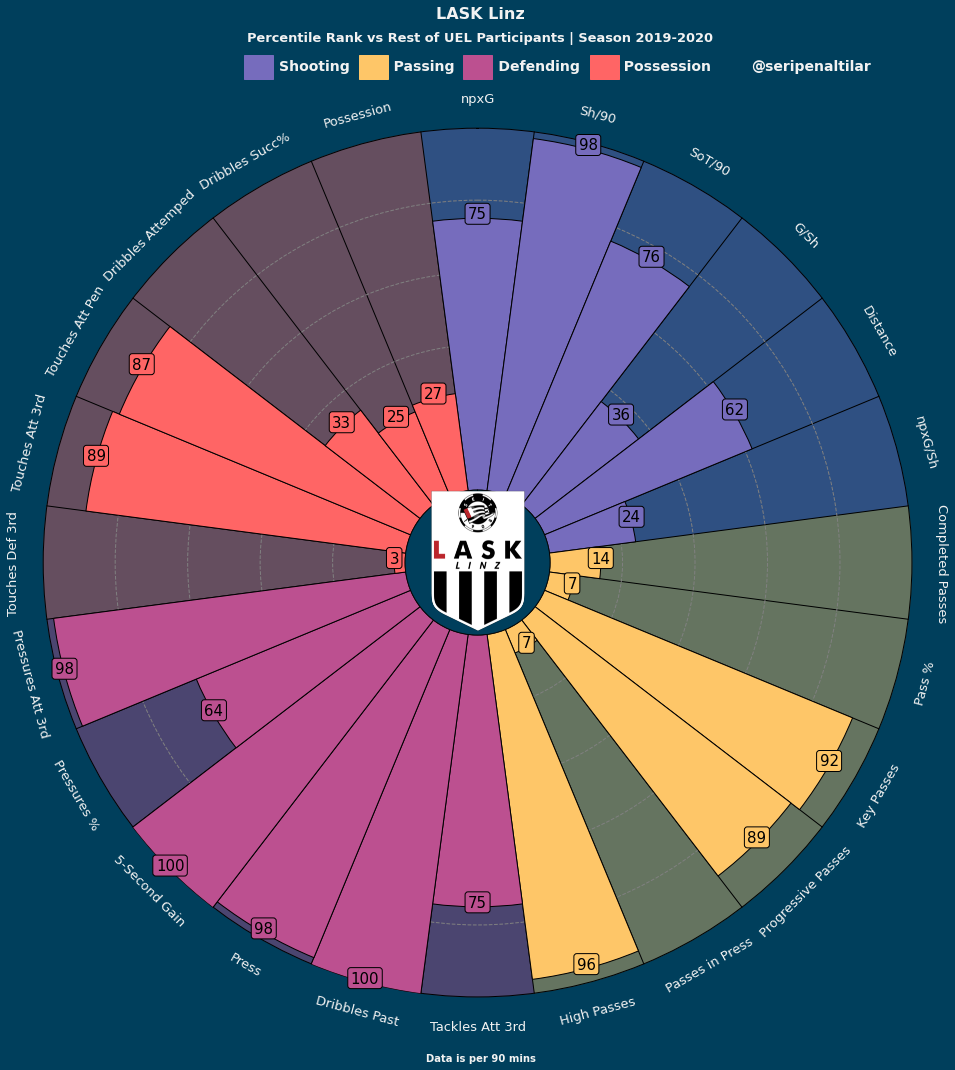

In [260]:
# color for the slices and text
slice_colors = ["#766cbd"] * 6 + ["#fec668"] * 6 + ["#bc5090"] * 6 + ["#ff6565"] * 6
text_colors = ["#000000"] * 24

# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#003f5c",     # background color
    straight_line_color="#000000",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_color="#000000",    # color for last line
    last_circle_lw=2,               # linewidth of last circle
    other_circle_lw=1,              # linewidth for other circles
    inner_circle_size=20            # size of inner circle
)

# plot pizza
fig, ax = baker.make_pizza(
    values,                          # list of values
    figsize=(16, 16),                # adjust the figsize according to your need
    color_blank_space="same",        # use the same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#000000", zorder=2, linewidth=1
    ),                               # values to be used when plotting slices
    kwargs_params=dict(
        color="#F2F2F2", fontsize=13, va="center"
    ),                               # values to be used when adding parameter labels
    kwargs_values=dict(
        color="#F2F2F2", fontsize=15,zorder=3,
        bbox=dict(
            edgecolor="#000000",
            boxstyle="round,pad=0.2", lw=1
        )
    )                                # values to be used when adding parameter-values labels
)

# add title
fig.text(
    0.515, 0.975, "LASK Linz", size=16,
    ha="center", color="#F2F2F2",fontweight='bold'
)

# add subtitle
fig.text(
    0.515, 0.955,
    "Percentile Rank vs Rest of UEL Participants | Season 2019-2020",
    size=13,
    ha="center", color="#F2F2F2",fontweight='bold'
)


# add text
fig.text(
    0.34, 0.93, "Shooting         Passing         Defending         Possession", size=14,
    color="#F2F2F2",fontweight='bold'
)

fig.text(
    0.75, 0.93, "@seripenaltilar", size=14,
    color="#F2F2F2",fontweight='bold'
)

fig.text(
    0.515, 0.07, "Data is per 90 mins", size=10,
    ha="center", color="#F2F2F2",fontweight='bold'
)

# add rectangles
fig.patches.extend([
    plt.Rectangle(
        (0.31, 0.9225), 0.025, 0.021, fill=True, color="#766cbd",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.41, 0.9225), 0.025, 0.021, fill=True, color="#fec668",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.50, 0.9225), 0.025, 0.021, fill=True, color="#bc5090",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.61, 0.9225), 0.025, 0.021, fill=True, color="#ff6565",
        transform=fig.transFigure, figure=fig
    ),
])

# add image
ax_image = add_image(
    image, fig, left=0.4478, bottom=0.4410, width=0.13, height=0.1250
) 

plt.show()